In [1]:
from superfv import AdvectionSolver, initial_conditions
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def passive_square(x, y, z):
    xc, yc = x - 0.5, y - 0.75
    return np.where(
        (np.abs(xc) < 0.15) & (np.abs(yc) < 0.15),
        1.0,
        0.0,
    )


solver = AdvectionSolver(
    ic=initial_conditions.slotted_disk,
    ic_passives={"passive_square": passive_square},
    bcx="ic",
    bcy="ic",
    nx=64,
    ny=64,
    nz=1,
    p=3,
    interpolation_scheme="transverse",
    MOOD=True,
)

solver.run([np.pi, 2 * np.pi])

100%|██████████| 6.283185307179586/6.283185307179586 [00:18]   


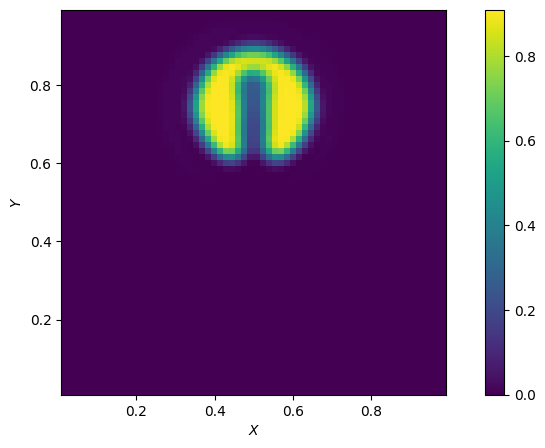

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
solver.plot_2d_slice(ax, "rho", x=None, y=None)
# add colorbar
ax.figure.colorbar(ax.images[0], ax=ax)

In [4]:
print(solver.timer.report())

Category                                    Time (s)
----------------------------------------------------
!FiniteVolumeSolver.run                        18.38
!ODE_INT                                       18.36
AdvectionSolver.MOOD_violation_check            2.05
AdvectionSolver.advection_upwind                1.69
AdvectionSolver.compute_dt_and_fluxes          13.30
AdvectionSolver.get_dt                          0.38
ExplicitODESolver.integrate                    18.38
FiniteVolumeSolver.MOOD_loop                    9.86
FiniteVolumeSolver.apply_bc                     4.94
FiniteVolumeSolver.compute_numerical_fluxes     3.88
FiniteVolumeSolver.f                           17.78
FiniteVolumeSolver.interpolate                  5.28
FiniteVolumeSolver.interpolate_face_nodes       5.43

